In [194]:
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch


# Alzheimer

In [195]:
import ast
ae_classif = pd.read_excel('metrics_bernn(3).xlsx', sheet_name='alzheimer classif values', index_col='model')
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_classif['model'] = ae_classif.index
model_names = ae_classif['model'].tolist()


In [196]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


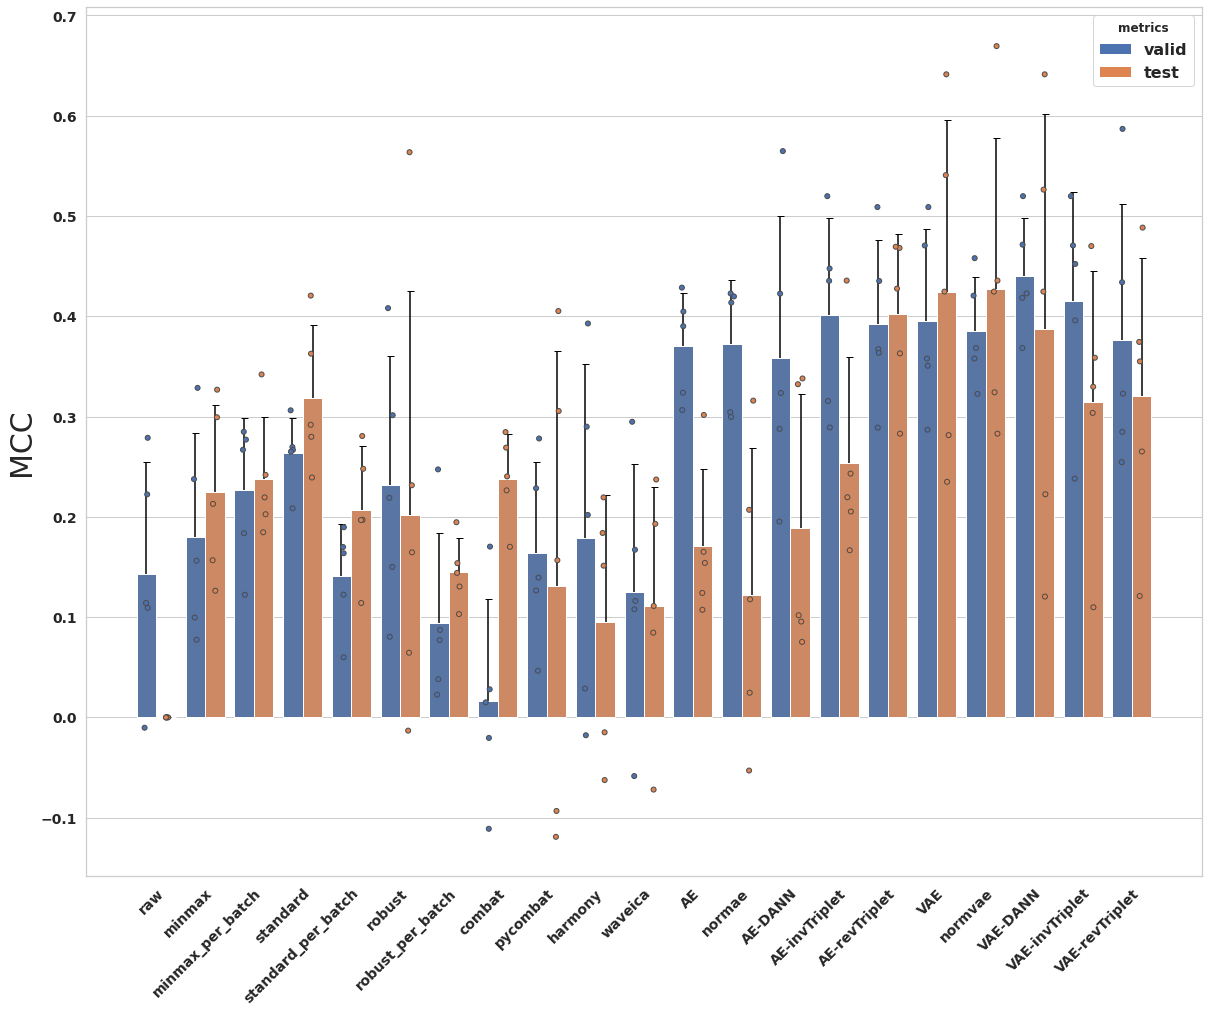

In [197]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='mcc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("MCC",fontsize=30)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=14)

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['valid', "test"], ['C0', 'C1'])
]

g.legend(handles=handles, fontsize=16, title="metrics")


In [198]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((ae_classif['valid/acc'], ae_classif['test/acc'])),
    # "sd" : pd.concat((ae_classif['valid/acc_std'], ae_classif['test/acc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['valid/acc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['test/acc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


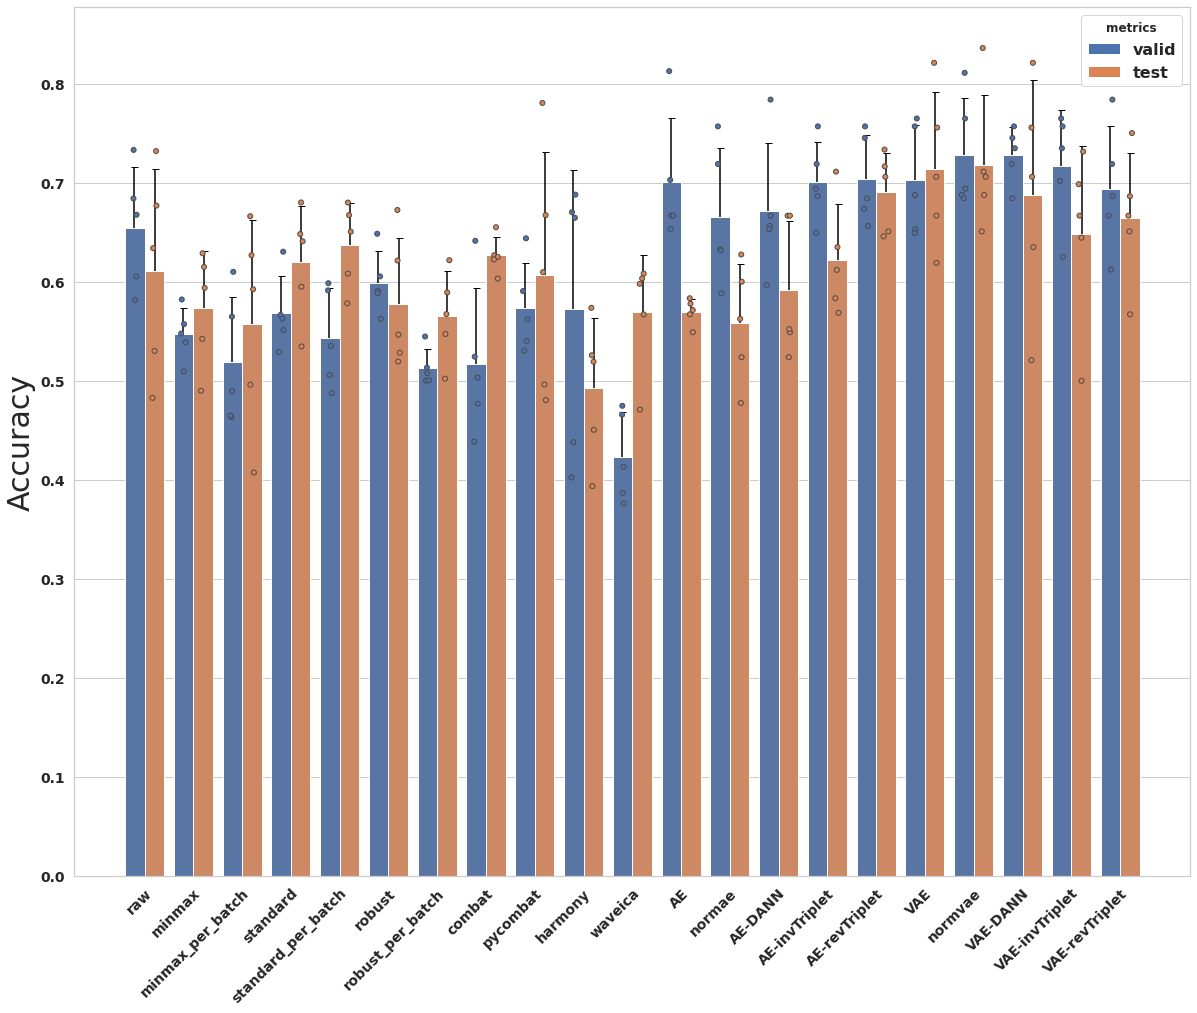

In [199]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='acc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Accuracy",fontsize=30)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=14)

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['valid', "test"], ['C0', 'C1'])
]

g.legend(handles=handles, fontsize=16, title="metrics")


# Amide

In [200]:
import ast
# ae_classif = pd.read_excel('metrics_bernn.xlsx', sheet_name='amide metrics values', index_col='model name')
ae_classif = pd.read_excel('metrics_bernn(3).xlsx', sheet_name='amide classif values', index_col='Unnamed: 0')

# ae_classif.drop(columns=['model name'], inplace=True)
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# ae_metrics.loc[:, 'BE'] = [(np.log(21) - x)/np.log(21) for x in ae_classif.loc[:, 'BE']]
# ae_metrics.loc[:, 'qc_aPCC'] = [[1 - xx for xx in x] for x in ae_classif.loc[:, 'qc_aPCC']]
ae_classif['model'] = ae_classif.index
model_names = ae_classif['model'].tolist()


In [201]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

df = df.reset_index()
df = df.drop('index', 1)
df_valid = df_valid.reset_index()
df_valid = df_valid.drop('index', 1)
df_test = df_test.reset_index()
df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


/tmp/ipykernel_3650913/1513299797.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('index', 1)
/tmp/ipykernel_3650913/1513299797.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_valid = df_valid.drop('index', 1)
/tmp/ipykernel_3650913/1513299797.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('index', 1)


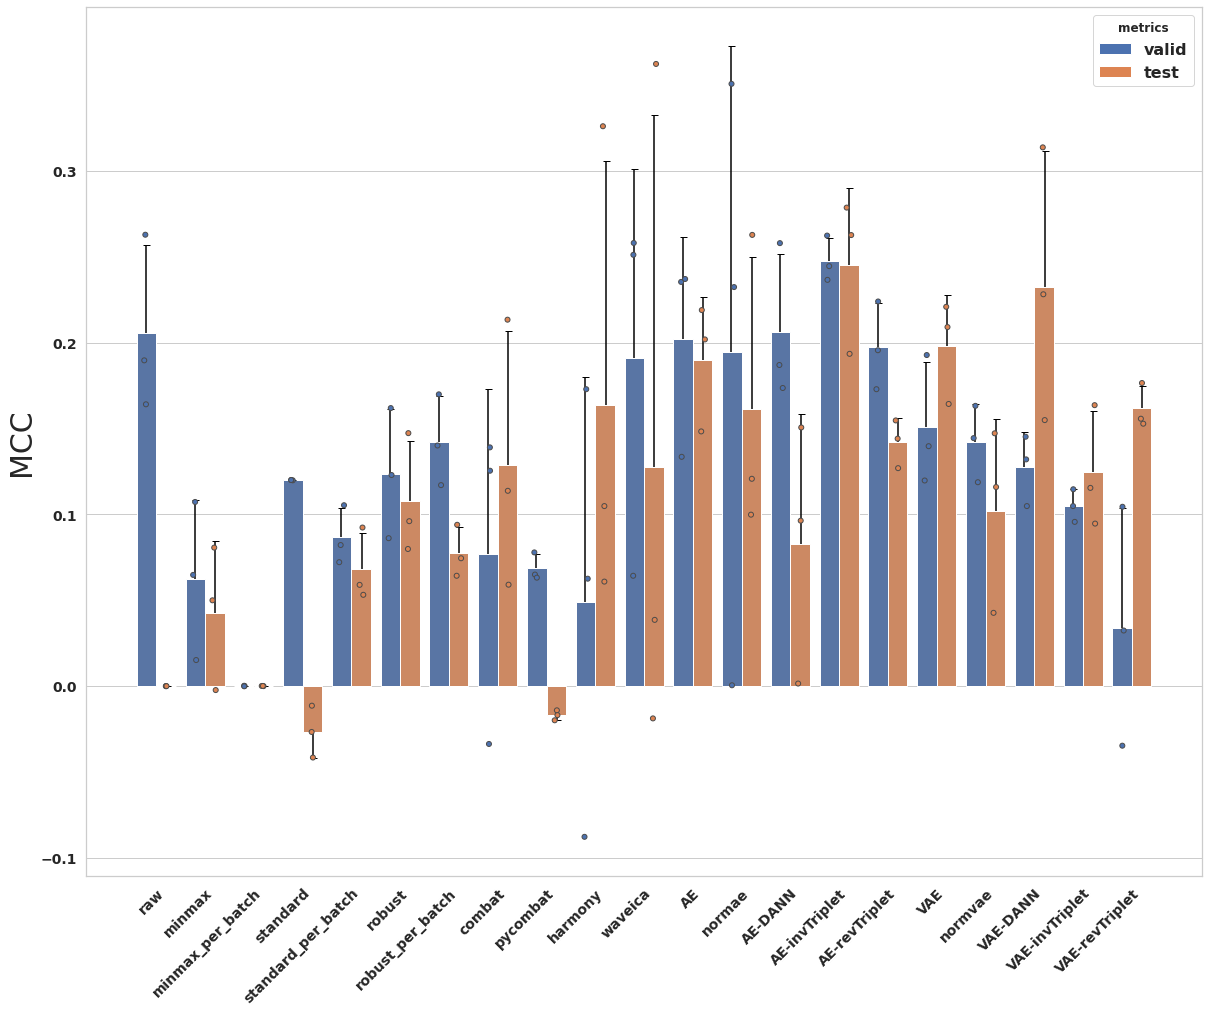

In [202]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='mcc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("MCC",fontsize=30)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=14)

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['valid', "test"], ['C0', 'C1'])
]

g.legend(handles=handles, fontsize=16, title="metrics")


In [203]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((ae_classif['valid/acc'], ae_classif['test/acc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['valid/acc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['test/acc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


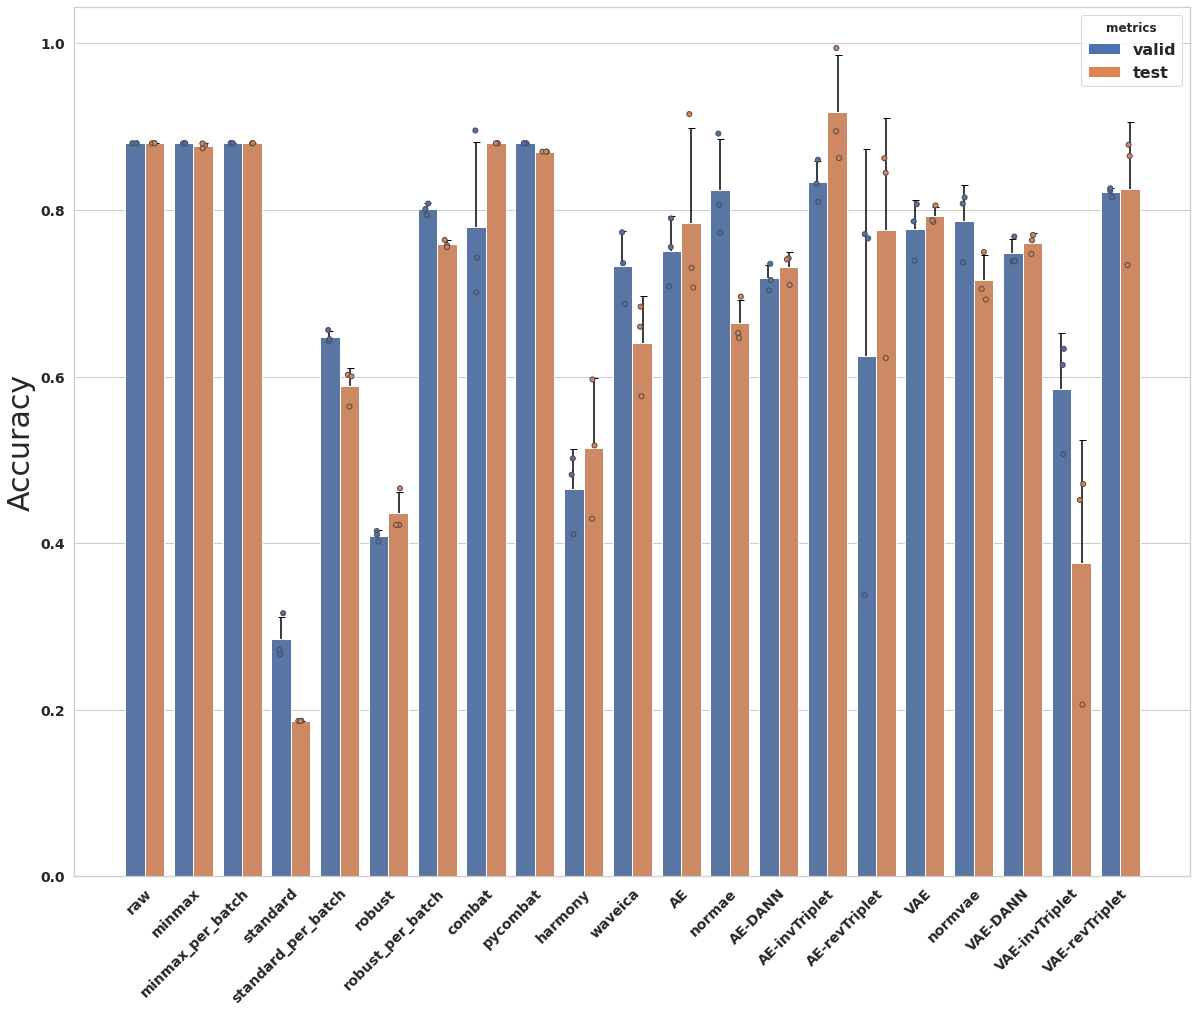

In [204]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='acc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Accuracy",fontsize=30)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=14)

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['valid', "test"], ['C0', 'C1'])
]

g.legend(handles=handles, fontsize=16, title="metrics")


# Mice

In [205]:
import ast
# ae_metrics = pd.read_excel('metrics_bernn.xlsx', sheet_name='amide metrics values', index_col='model name')
ae_classif = pd.read_excel('metrics_bernn(3).xlsx', sheet_name='mice classif values', index_col='Unnamed: 0')

# ae_metrics.drop(columns=['model name'], inplace=True)
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_classif['model'] = ae_classif.index
model_names = ae_classif['model'].tolist()


In [206]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


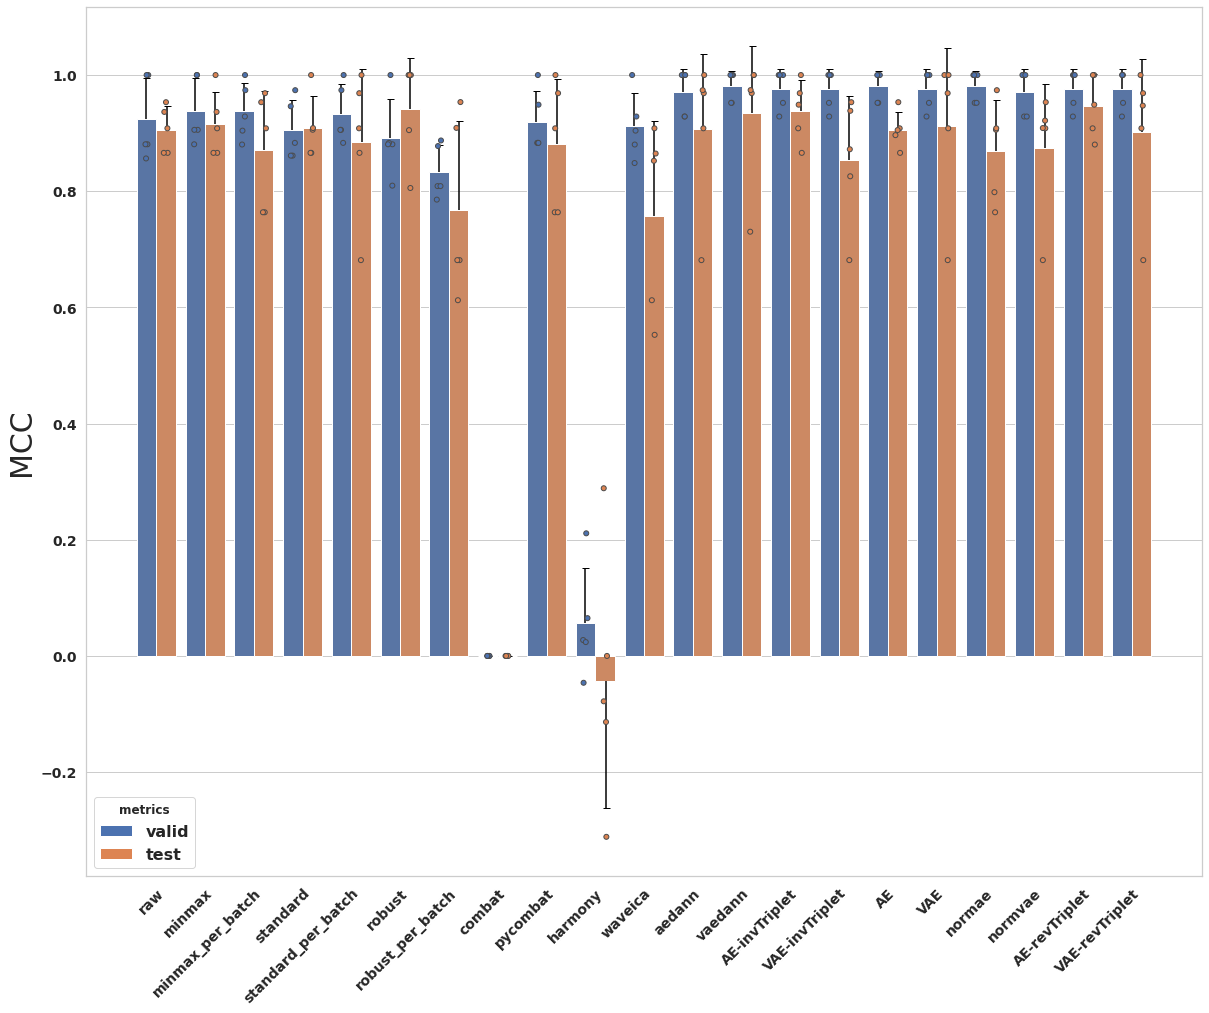

In [207]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='mcc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("MCC",fontsize=30)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=14)

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['valid', "test"], ['C0', 'C1'])
]

g.legend(handles=handles, fontsize=16, title="metrics")


In [208]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((ae_classif['valid/acc'], ae_classif['test/acc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['valid/acc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['test/acc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


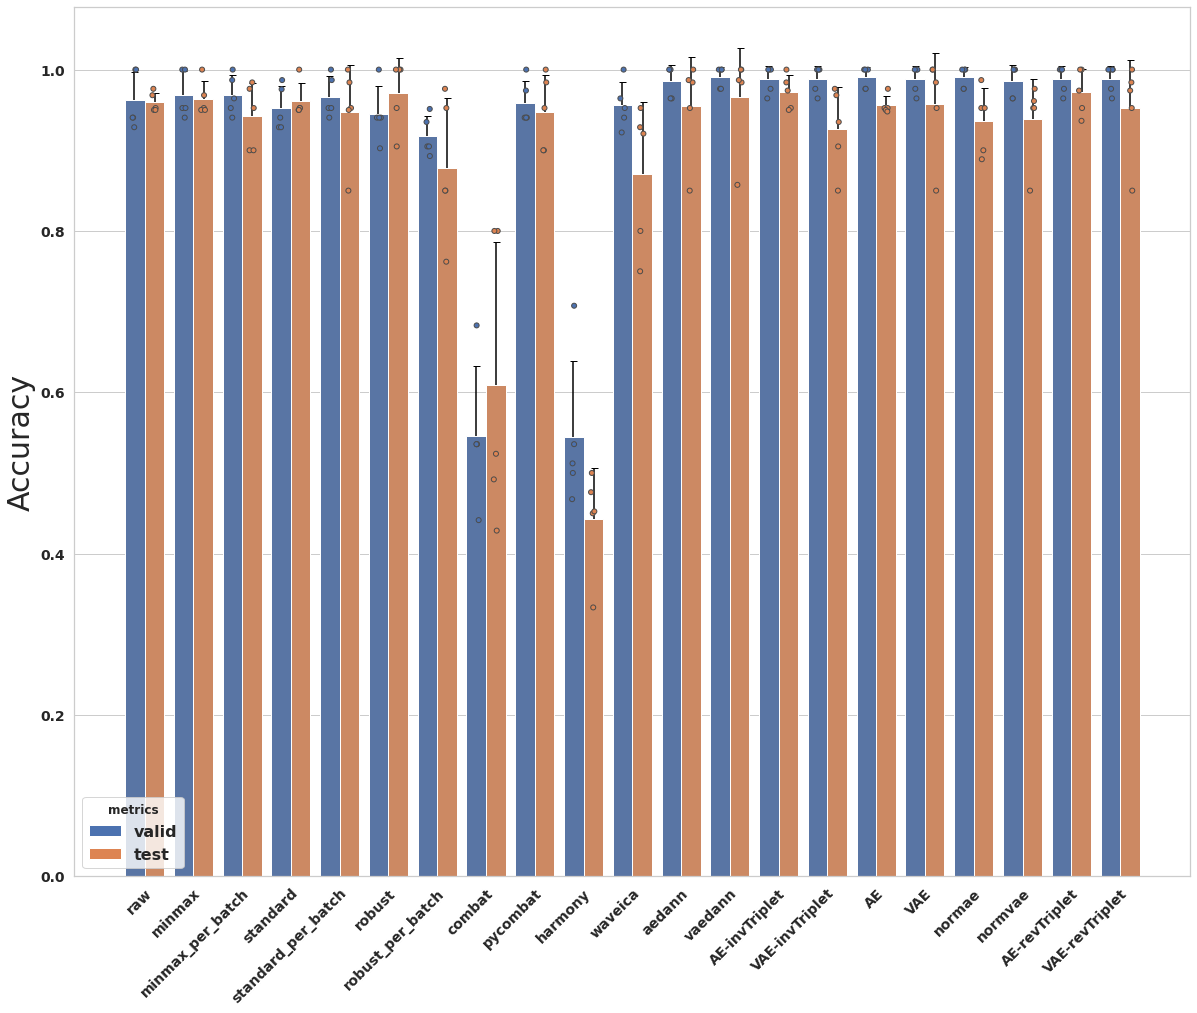

In [209]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='acc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Accuracy",fontsize=30)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=14)

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(['valid', "test"], ['C0', 'C1'])
]

g.legend(handles=handles, fontsize=16, title="metrics")
